<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" align="left" height=100 width=200>

🚀 [**`Kaggle - Machine Learning from Disaster`**](https://www.kaggle.com/c/titanic) 🚀

# ℹ️ Readme

* ✍️ This challenge was written by [davydw](https://github.com/davydw)
* 🎯 The goal is to predict whether a passenger from the Titanic survived or not
* 🚓 It is designed only for Davy's students and cannot be reproduced without davydw's authorization. Indeed, he is no longer working as a full time employee at Le Wagon. Hence, the latter cannot claim and publish this recap on their learning platform `Kitt` without his consent.


# 📚 Libraries

In [1]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np

# DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# (1) 🛳️ Dataset

In [2]:
data = sns.load_dataset('titanic').drop(columns=['alive','embarked','pclass'])
data

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,True
887,1,female,19.0,0,0,30.0000,First,woman,False,B,Southampton,True
888,0,female,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,False
889,1,male,26.0,0,0,30.0000,First,man,True,C,Cherbourg,True


In [3]:
data.dtypes.value_counts()

int64       3
object      3
float64     2
bool        2
category    1
category    1
dtype: int64

<AxesSubplot:ylabel='None'>

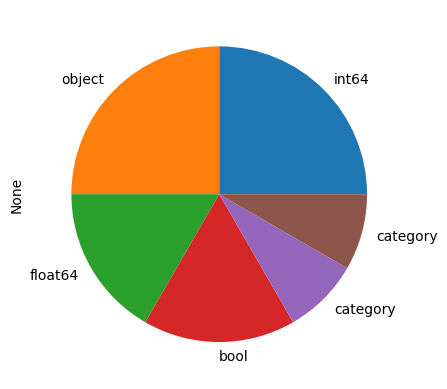

In [4]:
data.dtypes.value_counts().plot(kind="pie")

In [5]:
data.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'deck', 'embark_town', 'alone'],
      dtype='object')

# (2) 🧹 Cleaning the dataset

## (2.1) 👥 Duplicates ?

In [6]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [7]:
data.duplicated().sum()

107

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.shape

(784, 12)

## (2.2) ❓ Missing values

<AxesSubplot:>

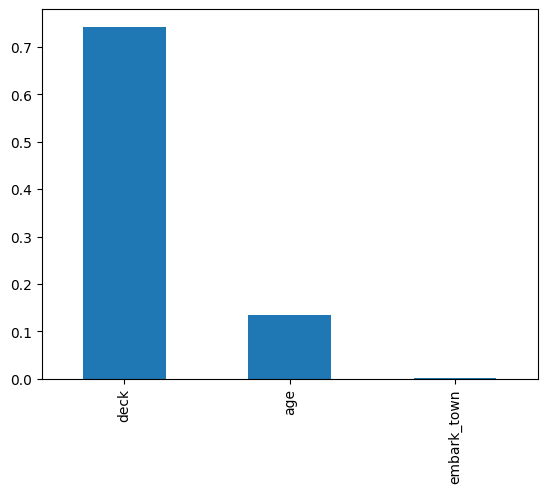

In [10]:
total_missing_data = (data.isna().sum()/len(data)).sort_values(ascending=False)
missing_mask = total_missing_data > 0
real_missing_values = total_missing_data[missing_mask]
real_missing_values.plot.bar()

**`Deck`**

In [11]:
data.drop(columns = ["deck"], inplace = True)

**`age`**

In [12]:
data.head()

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,True,Southampton,True


In [13]:
data[["age"]].describe()

,age
count,678.000000
mean,29.869351
std,14.759076
min,0.420000
25%,20.000000
50%,28.250000
75%,39.000000
max,80.000000


In [14]:
knn_imputer = KNNImputer(n_neighbors = 5)
knn_imputer.fit(data[["age"]])
data["age"] = knn_imputer.transform(data[["age"]])

**`embarked` & `embark_town`**

In [15]:
simple_imputer_categorical = SimpleImputer(strategy="most_frequent")
simple_imputer_categorical.fit(data[["embark_town"]])
data[["embark_town"]] = simple_imputer_categorical.transform(data[["embark_town"]])

## (2.3) 🎯 Define features and target

In [16]:
y = data["survived"]
X = data.drop(columns = ["survived"])

## (2.4) ✂️ Holdout method

In [17]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((548, 10), (236, 10), (548,), (236,))

## (2.5) 🔢 Scaling numerical features

In [19]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head(3)

,age,sibsp,parch,fare
116,70.500000,0,0,7.7500
155,51.000000,0,1,61.3792
82,29.869351,0,0,7.7875


In [20]:
numerical_features = X_train_num.columns
numerical_features

Index(['age', 'sibsp', 'parch', 'fare'], dtype='object')

In [21]:
# OPTION 1: SCALE WITH A UNIQUE METHOD
# OPTION 2: ANALYZE EACH VARIABLE AND CHOOSE THE SCALER ACCORDINGLY... CF SECTION 2.14

In [22]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train_num)
X_train_num_scaled = pd.DataFrame(robust_scaler.transform(X_train_num), 
                                  columns = robust_scaler.get_feature_names_out())
X_train_num_scaled

,age,sibsp,parch,fare
0,2.902189,0.0,0.0,-0.300092
1,1.509332,0.0,1.0,1.680672
2,0.000000,0.0,0.0,-0.298707
3,-0.419239,0.0,0.0,-0.298401
4,0.009332,0.0,0.0,-0.235457
...,...,...,...,...
543,1.723618,1.0,0.0,2.304403
544,0.937903,1.0,1.0,0.383195
545,1.223618,0.0,0.0,0.835642
546,0.437903,0.0,0.0,-0.106187


In [23]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head(3)

,age,sibsp,parch,fare
399,28.0,0,0,12.65
806,39.0,0,0,0.00
874,28.0,1,0,24.00


In [24]:
X_test_num_scaled = pd.DataFrame(robust_scaler.transform(X_test_num), 
                                  columns = robust_scaler.get_feature_names_out())
X_test_num_scaled

,age,sibsp,parch,fare
0,-0.133525,0.0,0.0,-0.119114
1,0.652189,0.0,0.0,-0.586334
2,-0.133525,1.0,0.0,0.300092
3,-0.776382,0.0,0.0,0.521699
4,0.000000,0.0,0.0,-0.300092
...,...,...,...,...
231,-0.633525,0.0,0.0,-0.299169
232,0.080761,1.0,1.0,0.383195
233,-0.419239,0.0,2.0,0.030471
234,0.000000,1.0,0.0,1.334257


## (2.6) 🔡 Encoding categorical features

In [25]:
X_train_cat = X_train.select_dtypes(exclude=['int64', 'float64'])
X_train_cat.head(3)

,sex,class,who,adult_male,embark_town,alone
116,male,Third,man,True,Queenstown,True
155,male,First,man,True,Cherbourg,False
82,female,Third,woman,False,Queenstown,True


In [26]:
X_test_cat = X_test.select_dtypes(exclude=['int64', 'float64'])
X_test_cat.head(3)

,sex,class,who,adult_male,embark_town,alone
399,female,Second,woman,False,Southampton,True
806,male,First,man,True,Southampton,True
874,female,Second,woman,False,Cherbourg,False


### (2.6.0) How many columns are expected ?

In [27]:
occurencies = X_train_cat.nunique().sort_values(ascending = False)
occurencies

class          3
who            3
embark_town    3
sex            2
adult_male     2
alone          2
dtype: int64

In [28]:
binary_mask = occurencies <=2
nb_binary_features = binary_mask.sum()
nb_binary_features

3

In [29]:
multiclass_mask = occurencies >= 3
nb_vectors_multiclasses =occurencies[multiclass_mask].sum()
nb_vectors_multiclasses

9

In [30]:
nb_total_vectors = nb_binary_features + nb_vectors_multiclasses
nb_total_vectors

12

### (2.6.1) OneHotEncoder

In [31]:
features_ohe = ['sex', 'who', 'adult_male', 'embark_town','alone']

In [32]:
ohe = OneHotEncoder(drop = "if_binary",
                    sparse_output = False,
                    handle_unknown = "ignore")

In [33]:
ohe.fit(X_train_cat[features_ohe])

OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

In [34]:
X_train_cat_encoded = pd.DataFrame(ohe.transform(X_train_cat[features_ohe]),
                                   columns = ohe.get_feature_names_out())

X_train_cat_encoded.head(3)

,sex_male,who_child,who_man,who_woman,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_True
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [35]:
X_test_cat_encoded = pd.DataFrame(ohe.transform(X_test_cat[features_ohe]),
                                   columns = ohe.get_feature_names_out())

X_test_cat_encoded.head(3)

,sex_male,who_child,who_man,who_woman,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_True
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### (2.6.2) OrdinalEncoder

In [36]:
features_ordinal = ['class']

In [37]:
data['class'].value_counts()

Third     405
First     214
Second    165
Name: class, dtype: int64

In [38]:
ordinal_encoder = OrdinalEncoder(categories=[["Third","Second","First"]])

In [39]:
ordinal_encoder.fit(X_train_cat[features_ordinal])

OrdinalEncoder(categories=[['Third', 'Second', 'First']])

In [40]:
X_train_ordinal = pd.DataFrame(ordinal_encoder.transform(X_train_cat[features_ordinal]),
                              columns = ordinal_encoder.get_feature_names_out())

In [41]:
X_test_ordinal = pd.DataFrame(ordinal_encoder.transform(X_test_cat[features_ordinal]),
                              columns = ordinal_encoder.get_feature_names_out())

# (2.7) ⛓️ Concatenating

In [42]:
train_preprocessed = pd.concat([X_train_num_scaled, X_train_cat_encoded, X_train_ordinal], axis = 1)
train_preprocessed.head(3)

,age,sibsp,parch,fare,sex_male,who_child,who_man,who_woman,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_True,class
0,2.902189,0.0,0.0,-0.300092,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.509332,0.0,1.0,1.680672,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
2,0.000000,0.0,0.0,-0.298707,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [43]:
test_preprocessed = pd.concat([X_test_num_scaled, X_test_cat_encoded, X_test_ordinal], axis = 1)
test_preprocessed.head(3)

,age,sibsp,parch,fare,sex_male,who_child,who_man,who_woman,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_True,class
0,-0.133525,0.0,0.0,-0.119114,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.652189,0.0,0.0,-0.586334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0
2,-0.133525,1.0,0.0,0.300092,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# (2.8) 🐣 Baseline Model - Most Frequent

In [44]:
len(test_preprocessed)

236

In [45]:
y_train.value_counts()

0    319
1    229
Name: survived, dtype: int64

In [46]:
y_pred_baseline = pd.Series([0]*len(test_preprocessed))
y_pred_baseline

0      0
1      0
2      0
3      0
4      0
      ..
231    0
232    0
233    0
234    0
235    0
Length: 236, dtype: int64

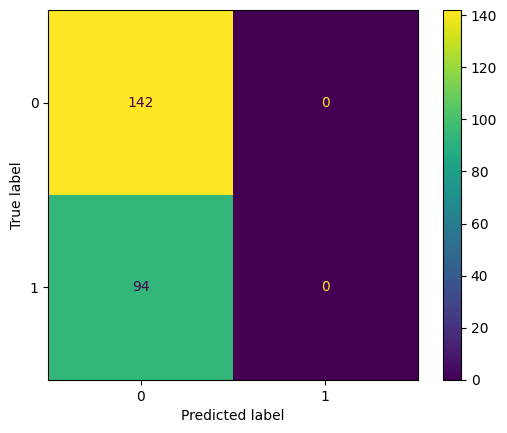

In [47]:
cm = confusion_matrix(y_test, y_pred_baseline, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [48]:
accuracy_score(y_test, y_pred_baseline)

0.6016949152542372

# (2.9) 💪Logistic Regression

In [49]:
logreg = LogisticRegression(max_iter = 1_000,  # LBFGS Convergence
                            penalty = "l2")    # Default penalty

In [50]:
logreg.fit(train_preprocessed, y_train)

LogisticRegression(max_iter=1000)

In [51]:
logreg.score(test_preprocessed, y_test)

0.8177966101694916

In [52]:
y_pred_logreg = logreg.predict(test_preprocessed)

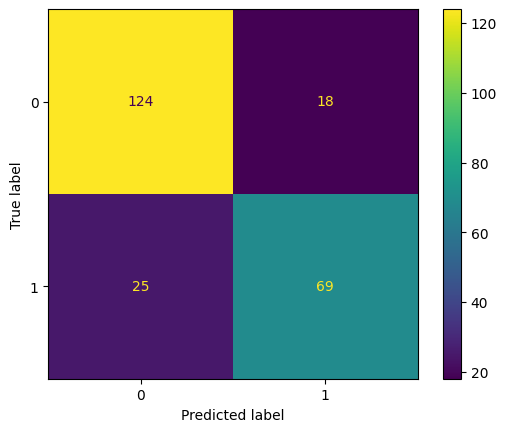

In [53]:
cm = confusion_matrix(y_test, y_pred_logreg, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [54]:
recall_score(y_test, y_pred_logreg)

0.7340425531914894

In [55]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       142
           1       0.79      0.73      0.76        94

    accuracy                           0.82       236
   macro avg       0.81      0.80      0.81       236
weighted avg       0.82      0.82      0.82       236



# (2.10) 🧨Threshold adjustment

In [56]:
targeted_recall = 0.95

In [57]:
# Predict probabilities
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(LogisticRegression(max_iter = 1_000),
                                                     train_preprocessed, y_train,
                                                     method = "predict_proba").T



In [58]:
# Generate precision and thresholds (and recalls) using probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_probas_1)

# Populate dataframe with precision and threshold
df_recall = pd.DataFrame({"recall" : recall[1:],
                          "threshold" : thresholds})


In [59]:
# New Threshold
new_threshold = df_recall[df_recall.recall > targeted_recall]["threshold"].max()
new_threshold

0.09617704994533871

In [60]:
# New predictions
y_pred_logreg_probas = logreg.predict_proba(test_preprocessed)
y_pred_logreg_probas.shape

(236, 2)

In [61]:
y_new_pred = y_pred_logreg_probas[:,1] > new_threshold
y_new_pred

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False, False, False,
        True,  True,

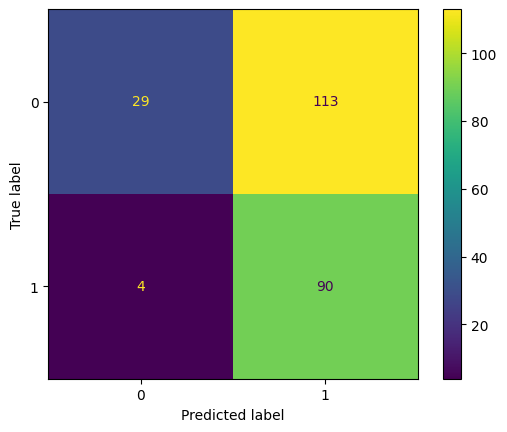

In [62]:
cm = confusion_matrix(y_test, y_new_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [63]:
print(classification_report(y_test, y_new_pred))

              precision    recall  f1-score   support

           0       0.88      0.20      0.33       142
           1       0.44      0.96      0.61        94

    accuracy                           0.50       236
   macro avg       0.66      0.58      0.47       236
weighted avg       0.71      0.50      0.44       236



# (2.11) 🧑🏻‍🔬 Trying advanced models

### (2.11.1) KNeighborsClassifier

In [64]:
gridsearch_neigbhors = GridSearchCV(KNeighborsClassifier(), 
                                    param_grid = {
                                        'n_neighbors':np.arange(25,35)},
                                    scoring = ['accuracy','recall'],
                                    refit='recall',
                                    cv = 5,
                                    n_jobs = -1
                                   )
gridsearch_neigbhors.fit(train_preprocessed, y_train)
best_neighbors = gridsearch_neigbhors.best_estimator_
best_neighbors

KNeighborsClassifier(n_neighbors=27)

***ConfusionMatrix of the KNC before threshold adjustment***

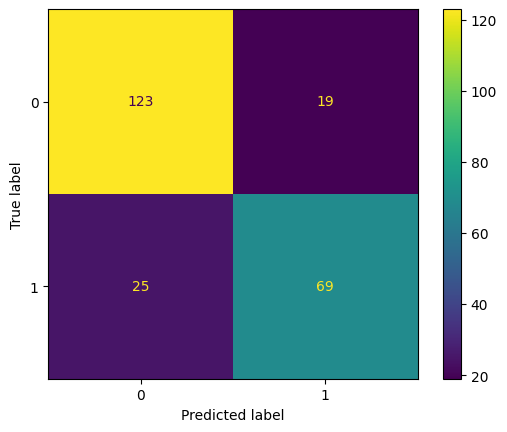

In [65]:
y_pred_best_neighbors = best_neighbors.predict(test_preprocessed)

cm = confusion_matrix(y_test, y_pred_best_neighbors, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [66]:
print(classification_report(y_test, y_pred_best_neighbors))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       142
           1       0.78      0.73      0.76        94

    accuracy                           0.81       236
   macro avg       0.81      0.80      0.80       236
weighted avg       0.81      0.81      0.81       236



***ConfusionMatrix of the KNC after threshold adjustment***

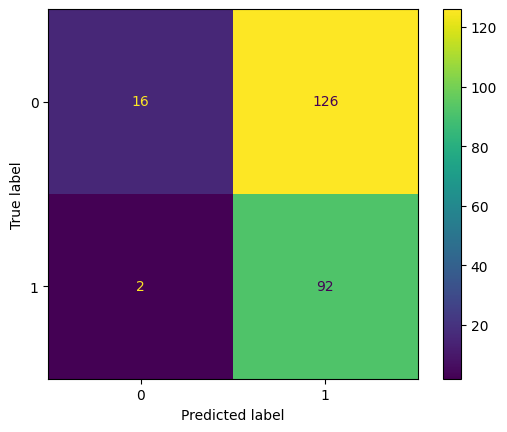

              precision    recall  f1-score   support

           0       0.89      0.11      0.20       142
           1       0.42      0.98      0.59        94

    accuracy                           0.46       236
   macro avg       0.66      0.55      0.39       236
weighted avg       0.70      0.46      0.36       236



In [67]:
targeted_recall = 0.95

# Predict probabilities
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(KNeighborsClassifier(n_neighbors=31),
                                                     train_preprocessed, y_train,
                                                     method = "predict_proba").T

# Generate precision and thresholds (and recalls) using probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_probas_1)

# Populate dataframe with precision and threshold
df_recall = pd.DataFrame({"recall" : recall[1:],
                          "threshold" : thresholds})

# New Threshold
new_threshold = df_recall[df_recall.recall > targeted_recall]["threshold"].max()

# New predictions
y_pred_knc_probas = best_neighbors.predict_proba(test_preprocessed)

y_new_pred_knc = y_pred_knc_probas[:,1] > new_threshold

cm = confusion_matrix(y_test, y_new_pred_knc, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

print(classification_report(y_test, y_new_pred_knc))

### (2.11.2) Support Vector Classifiers

In [68]:
random_search_svc = RandomizedSearchCV(SVC(), 
                                       param_distributions = {'C': stats.loguniform(0.01, 1)},
                                       scoring = ['accuracy','recall'],
                                       refit='recall',
                                       cv = 5,
                                       n_jobs = -1,
                                       n_iter = 100
                                      )
random_search_svc.fit(train_preprocessed, y_train)
best_svc = random_search_svc.best_estimator_
best_svc

SVC(C=0.1056708480773088)

***ConfusionMatrix of the SVC before threshold adjustment***

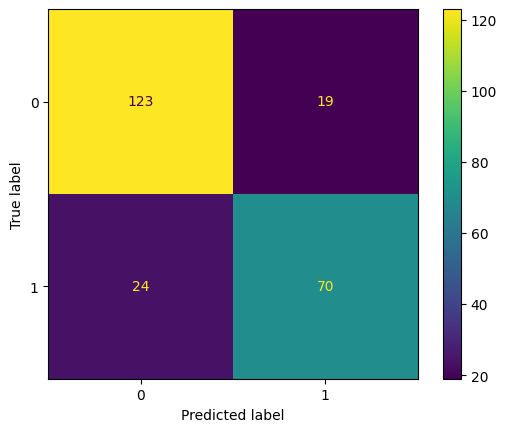

In [69]:
y_pred_best_svc = best_svc.predict(test_preprocessed)

cm = confusion_matrix(y_test, y_pred_best_svc, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

***ConfusionMatrix of the SVC after threshold adjustment***

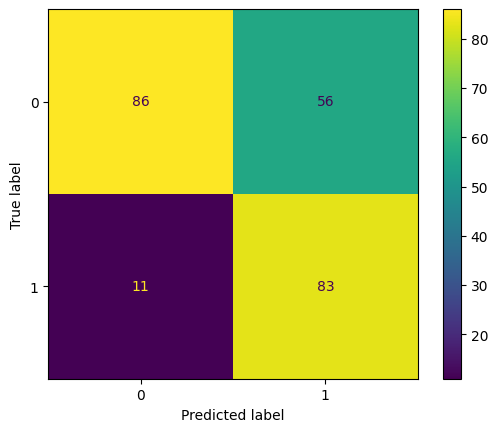

              precision    recall  f1-score   support

           0       0.89      0.61      0.72       142
           1       0.60      0.88      0.71        94

    accuracy                           0.72       236
   macro avg       0.74      0.74      0.72       236
weighted avg       0.77      0.72      0.72       236



In [70]:
targeted_recall = 0.95

# Predict probabilities
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(SVC(probability = True),
                                                     train_preprocessed, y_train,
                                                     method = "predict_proba").T

# Generate precision and thresholds (and recalls) using probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_probas_1)

# Populate dataframe with precision and threshold
df_recall = pd.DataFrame({"recall" : recall[1:],
                          "threshold" : thresholds})

# New Threshold
new_threshold = df_recall[df_recall.recall > targeted_recall]["threshold"].max()

# New prediction
best_svc_model = SVC(probability = True, C = random_search_svc.best_params_['C'])
best_svc_model.fit(train_preprocessed, y_train)
y_pred_svc_probas = best_svc_model.predict_proba(test_preprocessed)

y_new_pred_svc = y_pred_svc_probas[:,1] > new_threshold

cm = confusion_matrix(y_test, y_new_pred_svc, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

print(classification_report(y_test, y_new_pred_svc))

# (2.12) 📊 Comparing models

`LogisticRegression` + `Threshold adjustment` led to 97% of `recall` among the passengers who remained alive 

# (2.13) 🔩 Preprocessing with `Pipeline` and `ColumnTransformer`

## (2.13.0) Reloading the dataset

In [71]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

In [72]:
# Let's start from... the beginning
data = sns.load_dataset('titanic').drop(columns=['alive','embarked','class'])
# 70% of missing values for deck
data.drop(columns = ["deck"], inplace = True)

In [73]:
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True


In [74]:
y = data["survived"]
X = data.drop(columns=["survived"])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

* Numerical features:
    - We need to impute `age`
    - Scale the features
    
    
* Categorical features:
    - We need to impute `embark_town`
    - Encode the categorical features

## (2.13.1) Fine-grained approach to scaling numerical features

In [76]:
X_train_num = X_train.select_dtypes(include=["int64","float64"])
X_test_num = X_test.select_dtypes(include=["int64","float64"])

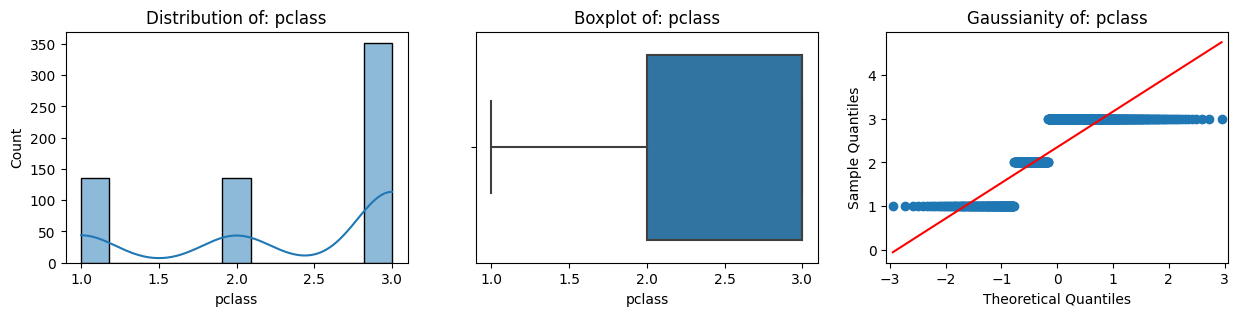

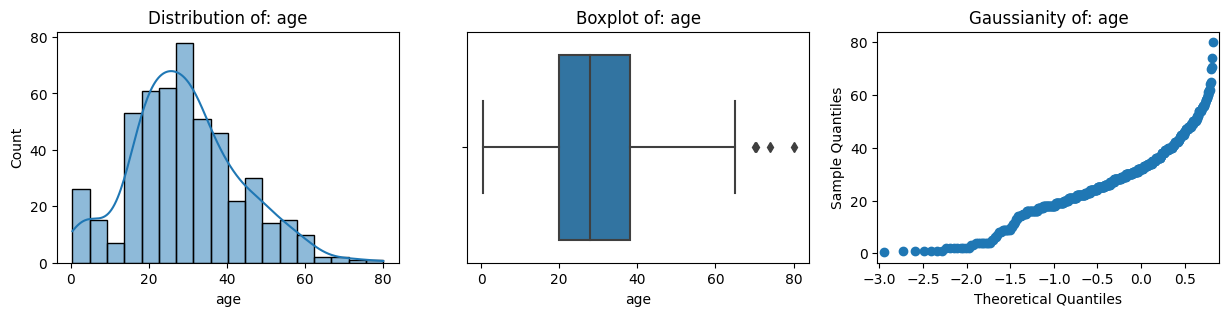

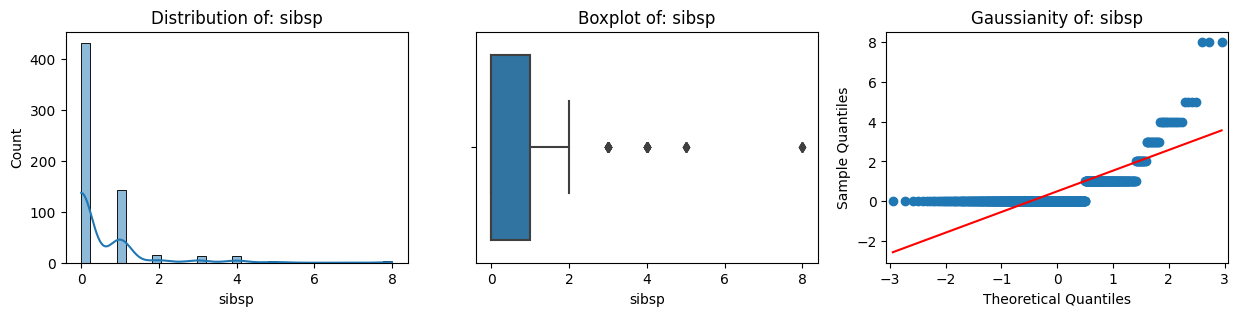

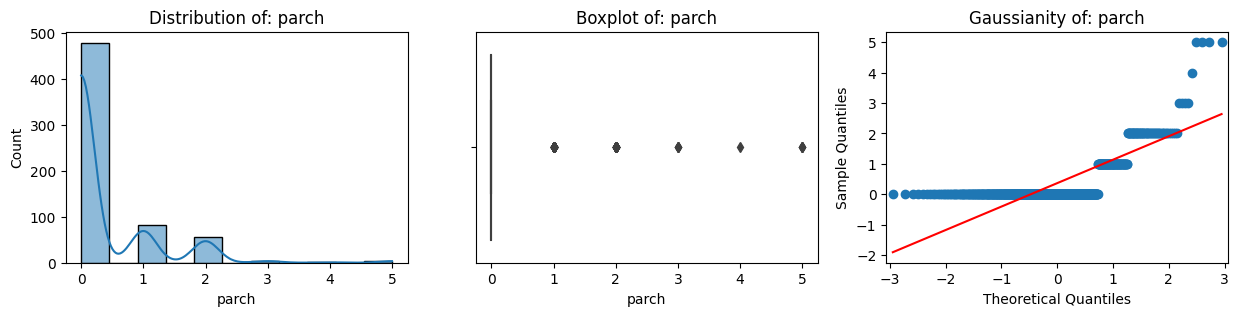

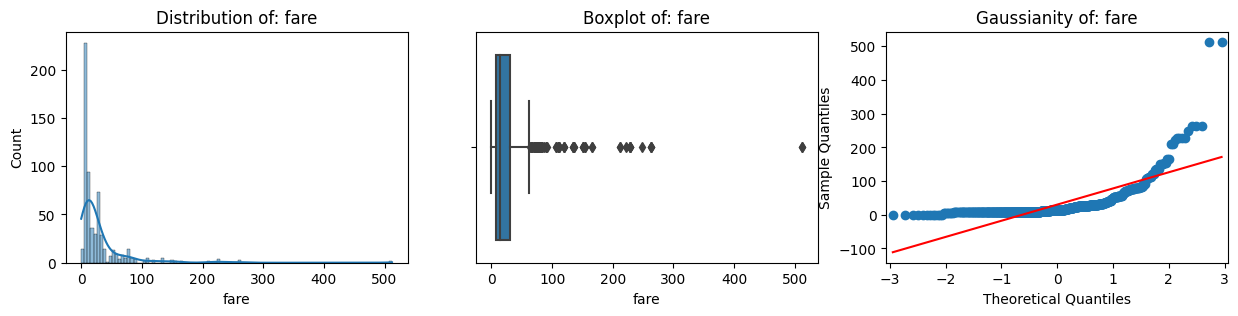

In [77]:
for numerical_feature in X_train_num.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = X_train_num, x = numerical_feature, kde=True, ax = ax[0]);
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = X_train_num, x = numerical_feature, ax=ax[1]);
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(X_train_num[numerical_feature],line='s',ax=ax[2]);

    plt.show();

In [78]:
features_robust = ['age','fare']
features_standard = ['sibsp']
features_minmax = ['pclass','parch']

In [79]:
scalers = ColumnTransformer([
    ("robust_scaler", RobustScaler(), features_robust),
    ("standard_scaler", StandardScaler(), features_standard),
    ("minmax_scaler", MinMaxScaler(), features_minmax),    
])

scalers

ColumnTransformer(transformers=[('robust_scaler', RobustScaler(),
                                 ['age', 'fare']),
                                ('standard_scaler', StandardScaler(),
                                 ['sibsp']),
                                ('minmax_scaler', MinMaxScaler(),
                                 ['pclass', 'parch'])])

In [80]:
numerical_pipeline = Pipeline([
    ("neighbor_numerical_imputer", KNNImputer(n_neighbors = 5)),
    ("scalers", scalers)
]).set_output(transform="pandas")

numerical_pipeline

Pipeline(steps=[('neighbor_numerical_imputer', KNNImputer()),
                ('scalers',
                 ColumnTransformer(transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['age', 'fare']),
                                                 ('standard_scaler',
                                                  StandardScaler(), ['sibsp']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['pclass', 'parch'])]))])

In [81]:
# In one line, I can impute the missing values for the age and apply three scalers !!!
numerical_pipeline.fit_transform(X_train_num).head()

,robust_scaler__age,robust_scaler__fare,standard_scaler__sibsp,minmax_scaler__pclass,minmax_scaler__parch
299,1.453333,10.732831,-0.478486,0.0,0.2
60,-0.413333,-0.287596,-0.478486,1.0,0.0
308,0.120000,0.481559,0.483117,0.5,0.0
679,0.520000,22.877666,-0.478486,0.0,0.2
300,0.646667,-0.263711,-0.478486,1.0,0.0


## (2.13.2) Imputing and encoding categorical features

In [82]:
categorical_pipeline = Pipeline([
    ("categorical_imputer", SimpleImputer(strategy = "most_frequent")),
    ("ohe", OneHotEncoder(sparse_output = False, drop = "if_binary", handle_unknown="ignore"))
]).set_output(transform="pandas")

categorical_pipeline

Pipeline(steps=[('categorical_imputer',
                 SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

In [83]:
X_train_cat = X_train.select_dtypes(exclude=["int64","float64"])
X_test_cat = X_test.select_dtypes(exclude=["int64","float64"])

In [84]:
X_train_cat.head(3)

,sex,who,adult_male,embark_town,alone
299,female,woman,False,Cherbourg,False
60,male,man,True,Cherbourg,True
308,male,man,True,Cherbourg,False


In [85]:
# Applying the simple imputer and OHE in one line !!!
categorical_pipeline.fit_transform(X_train_cat).head(3)

,sex_male,who_child,who_man,who_woman,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_True
299,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
60,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
308,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


## (2.13.3) The Preprocessor 🔥

In [86]:
preprocessor = ColumnTransformer([
    ("numerical_pipeline", numerical_pipeline, make_column_selector(dtype_include=["int64", "float64"])),
    ("categorical_pipeline", categorical_pipeline, make_column_selector(dtype_exclude=["int64", "float64"])),    
]).set_output(transform="pandas")

preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('neighbor_numerical_imputer',
                                                  KNNImputer()),
                                                 ('scalers',
                                                  ColumnTransformer(transformers=[('robust_scaler',
                                                                                   RobustScaler(),
                                                                                   ['age',
                                                                                    'fare']),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['sibsp']),
                                                                                  ('minmax_scaler',
                                                                                   MinMaxScaler(),
                                                                                   ['pclass',
                                                                                    'parch'])]))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x29596cd00>),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('categorical_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x29596e0e0>)])

In [87]:
preprocessor.fit_transform(X_train).head()


,numerical_pipeline__robust_scaler__age,numerical_pipeline__robust_scaler__fare,numerical_pipeline__standard_scaler__sibsp,numerical_pipeline__minmax_scaler__pclass,numerical_pipeline__minmax_scaler__parch,categorical_pipeline__sex_male,categorical_pipeline__who_child,categorical_pipeline__who_man,categorical_pipeline__who_woman,categorical_pipeline__adult_male_True,categorical_pipeline__embark_town_Cherbourg,categorical_pipeline__embark_town_Queenstown,categorical_pipeline__embark_town_Southampton,categorical_pipeline__alone_True
299,1.453333,10.732831,-0.478486,0.0,0.2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
60,-0.413333,-0.287596,-0.478486,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
308,0.120000,0.481559,0.483117,0.5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
679,0.520000,22.877666,-0.478486,0.0,0.2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
300,0.646667,-0.263711,-0.478486,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# (2.14) 🔥🔥🔥 Chaining a preprocessor and a model 🔥🔥🔥

In [88]:
pipelined_logistic_regression = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

In [89]:
# We don't need to fit on train_preprocessed anymore
# The different preprocessing steps will be applied to the train set through the pipeline
# And the last part is the LogisticRegression model/estimator which the train set will be trained on
pipelined_logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('neighbor_numerical_imputer',
                                                                   KNNImputer()),
                                                                  ('scalers',
                                                                   ColumnTransformer(transformers=[('robust_scaler',
                                                                                                    RobustScaler(),
                                                                                                    ['age',
                                                                                                     'fare']),
                                                                                                   ('standard_scaler',
                                                                                                    StandardScaler(),
                                                                                                    ['sibsp']),
                                                                                                   ('minmax_scaler',
                                                                                                    MinMaxScaler(),
                                                                                                    ['pclass',
                                                                                                     'parch'])]))]),
                                                  <skl...ject at 0x29596cd00>),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x29596e0e0>)])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [90]:
# We don't need to score and predict based on test_preprocessed anymore
# The different preprocessing steps will be applied to the set set through the pipeline
# And the last part is the LogisticRegression model/estimator which the test set will be evaluated on

y_pred_probas = pipelined_logistic_regression.predict_proba(X_test)

In [91]:
targeted_recall = 0.95

# Predict probabilities
pipelined_logistic_regression = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

y_pred_probas_0, y_pred_probas_1 = cross_val_predict(pipelined_logistic_regression,
                                                     X_train, y_train,
                                                     method = "predict_proba").T

# Generate precision and thresholds (and recalls) using probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_probas_1)

# Populate dataframe with precision and threshold
df_recall = pd.DataFrame({"recall" : recall[1:],
                          "threshold" : thresholds})

# New Threshold
new_threshold = df_recall[df_recall.recall > targeted_recall]["threshold"].max()


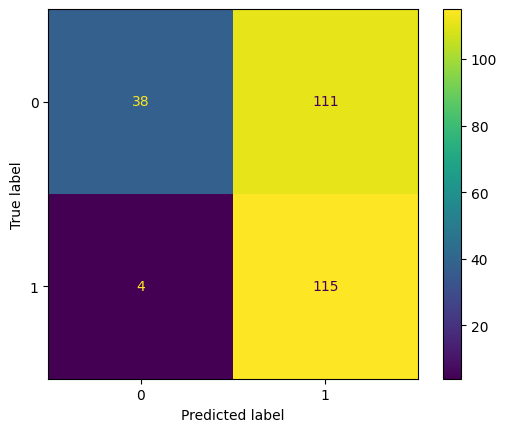

              precision    recall  f1-score   support

           0       0.90      0.26      0.40       149
           1       0.51      0.97      0.67       119

    accuracy                           0.57       268
   macro avg       0.71      0.61      0.53       268
weighted avg       0.73      0.57      0.52       268



In [92]:
# New predictions
y_new_pred_pipelined_logreg = y_pred_probas[:,1] > new_threshold

cm = confusion_matrix(y_test, y_new_pred_pipelined_logreg, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

print(classification_report(y_test, y_new_pred_pipelined_logreg))

🏁 🏁 🏁